# Assignment 3 - Optimization Methods
## Matteo Ghilardini
---

### Part 2: programming problem

#### Setup the environment:

Install the required libraries in the jupiter notebook environment:

In [124]:
pip install numpy matplotlib

Note: you may need to restart the kernel to use updated packages.


Import all the required libraries

In [125]:
import numpy as np
import matplotlib.pyplot as plt
from math import factorial, pow

#### **Problem 1** (Bell curve fitting)
To find the bell curve that bests fit the data, we will find the parameters $x$ that minimise the mean squared error:
$$
f(x) = \frac{1}{N}\sum^N_{i=1}(m(z^{(i)};x)-y^{(i)})^2
$$
i.e., we will solve the problem:
$$
\min_{x\in \R ^2}f(x)
$$

##### 1. Import the file `dataset1.csv` (available under _‘Assignment 3’_ on iCorsi) and store its content into an numpy `nd.array`. This file is a table containing 100 rows and 2 columns, representing 100 data points with 2 coordinates.  
Hint: import this table with numpy into an array with `np.loadtxt` with argument `skiprows=2` and `delimiter=","`.

In [126]:
dataset1 = np.loadtxt("dataset1.csv", skiprows=2, delimiter=",")

##### 2. Plot this point cloud as in Figure 1, with the first column on the x-axis and the second column one the y-axis.

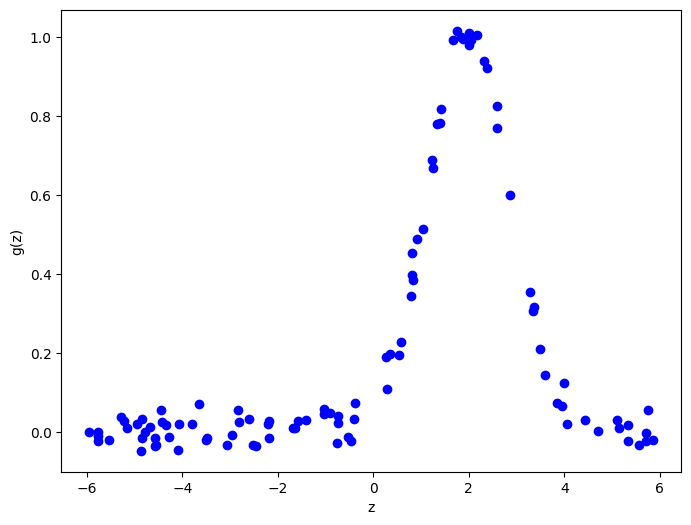

In [127]:
x = dataset1[:, 0] # First column from the dataset
g = dataset1[:, 1] # Second column from the dataset

plt.figure(figsize=(8, 6))
plt.scatter(x, g, color='blue')
plt.xlabel("z")
plt.ylabel("g(z)")
plt.show()

##### 3. Write a function that computes $f(x)$ defined above for any given $x = (x1, x2)$. This function must also take as argument the array containing the data points. Evaluate $f$ at $x = (1, 0.5)$ and $x = (0.5, 1)$.

Considering that 
$$
f(x) = \frac{1}{N}\sum^N_{i=1}(m(z^{(i)};x)-y^{(i)})^2
$$
and that $m(z;x)$ is defined as:
$$
m(z;x) = exp(-\frac{(z-y)^2}{x_2})
$$
The code that computes $f(x)$ for a given $x$ over the `dataset` is the following:

In [128]:

def f(x, dataset):
    x1, x2 = float(x[0]), float(x[1])   # Ensure x1 and x2 are floats
    z = dataset[:, 0]                   # First column from the dataset
    g = dataset[:, 1]                   # Second column from the dataset
    N = len(z)                          # Number of elements in the dataset

    m_zx = np.exp(-((z - x1) ** 2) / x2)        # Compute m(z; x)
    f_x = (1 / N) * np.sum((m_zx - g) ** 2)     # Compute f(x)

    return f_x


dataset1 = np.loadtxt("dataset1.csv", skiprows=2, delimiter=",")

print('f(x) with x=(1, 0.5) =', f([1, 0.5], dataset1))
print('f(x) with x=(0.5, 1) =', f([0.5, 1], dataset1))

f(x) with x=(1, 0.5) = 0.11204289613814822
f(x) with x=(0.5, 1) = 0.15009253657239355


##### 4. Show that
$$
\bigtriangledown f(x) = \frac{2}{N}\sum^N_{i=1}\frac{z^{(i)}-y}{x_2}\exp(-\frac{(z^{(i)}-y)^2}{x_2}) (\exp(-\frac{(z^{(i)}-y)^2}{x_2})-y^{(i)}).
\begin{bmatrix}
   2 \\
   \frac{z^{(i)}-y}{x_2}
\end{bmatrix}
$$

Since $f(x) = \frac{1}{N}\sum^N_{i=1}(m(z^{(i)};x)-y^{(i)})^2$ and $m(z;x) = exp(-\frac{(z-y)^2}{x_2})$, we know that $f(x)$ is defined as:
$$
f(x) = \frac{1}{N}\sum^N_{i=1}(exp(-\frac{(z-x_1)^2}{x_2})-y^{(i)})^2
$$

The gradient $\bigtriangledown f(x)$ is defined as
$$
\bigtriangledown f(x) = (\frac{\partial f}{\partial x_1}, \frac{\partial f}{\partial x_2})
$$
and so, we compute:
- **Partial derivate wrt $x_1$**:
    - we start having
        $$
        \frac{\partial f}{\partial x_1} = \frac{2}{N}\sum^N_{i=1}(exp(-\frac{(z^{(i)}-x_1)^2}{x_2})-y^{(i)})
        $$
    - then consider (for semplicity) 
        $$g(x_1) = -\frac{(z^{(i)}-x_1)^2}{x_2}$$ 
        and it follows that 
        $$g'(x_1)=\frac{2\cdot(z^{(i)}-x_1)}{x_2}$$
    - we have 
        $$\frac{d}{d x_1} \exp(g(x_1)) = \exp(g(x_1))\cdot g'(x_1)$$
        and so
        $$\frac{d}{d x_1} \exp(-\frac{(z^{(i)}-x_1)^2}{x_2}) = \exp(-\frac{(z^{(i)}-x_1)^2}{x_2})\cdot 2\frac{(z^{(i)}-x_1)}{x_2}$$
    - resulting at the end as
        $$
            \frac{\partial f}{\partial x_1} = \frac{2}{N}\sum^N_{i=1}(exp(-\frac{(z-x_1)^2}{x_2})-y^{(i)}) \cdot \exp(-\frac{(z^{(i)}-x_1)^2}{x_2})\cdot 2\frac{(z^{(i)}-x_1)}{x_2}
        $$
        that matches the given formula for $\bigtriangledown f(x)$

- **Partial derivate wrt $x_2$**
    - we start having
        $$
        \frac{\partial f}{\partial x_2} = \frac{2}{N}\sum^N_{i=1}(exp(-\frac{(z^{(i)}-x_1)^2}{x_2})-y^{(i)})
        $$
    - then consider (for semplicity) 
        $$g(x_2) = -\frac{(z^{(i)}-x_1)^2}{x_2}$$ 
        and it follows that 
        $$g'(x_2) = \frac{(z^{(i)}-x_1)^2}{x_2^2}$$
    - we have 
        $$\frac{d}{dx_2} \exp(g(x_2)) = \exp(g(x_2)) \cdot g'(x_2)$$
        and so
        $$\frac{d}{dx_2} \exp\left(-\frac{(z^{(i)}-x_1)^2}{x_2}\right) = \exp\left(-\frac{(z^{(i)}-x_1)^2}{x_2}\right) \cdot \frac{(z^{(i)}-x_1)^2}{x_2^2}$$
    - resulting at the end as
        $$
        \frac{\partial f}{\partial x_2} =  \frac{2}{N} \sum^N_{i=1} \left( \exp\left(-\frac{(z^{(i)}-x_1)^2}{x_2}\right) - y^{(i)} \right) \cdot \exp\left(-\frac{(z^{(i)}-x_1)^2}{x_2}\right) \cdot \frac{(z^{(i)}-x_1)^2}{x_2^2}
        $$

So at the end it results the following gradient vector:
$$
\bigtriangledown f(x) =
\begin{bmatrix}
    \frac{2}{N} \sum^N_{i=1} \left( \exp\left(-\frac{(z^{(i)}-x_1)^2}{x_2}\right) - y^{(i)} \right) \cdot \exp\left(-\frac{(z^{(i)}-x_1)^2}{x_2}\right) \cdot \frac{2(z^{(i)}-x_1)}{x_2} \\
    \frac{2}{N} \sum^N_{i=1} \left( \exp\left(-\frac{(z^{(i)}-x_1)^2}{x_2}\right) - y^{(i)} \right) \cdot \exp\left(-\frac{(z^{(i)}-x_1)^2}{x_2}\right) \cdot \frac{(z^{(i)}-x_1)^2}{x_2^2}
\end{bmatrix}
$$


**The formula given in the exercise, actualy is not the gradient vector $\bigtriangledown f(x)$, but is the formula of the partial derivate $\frac{\partial f}{\partial x_1}$.**  
I do not know whether this is a typo or whether I misinterpreted the exercise; when in doubt, I also calculated $\frac{\partial f}{\partial x_2}$ since is needed for the following exercises.

##### 5. Write a function that computes the gradient of $f$ for any given $x$ and evaluate $\nabla f$ at $x = (1, 0.5)$ and $x = (0.5, 1)$.

In [129]:
def gradient_f(x, dataset):
    x1, x2 = float(x[0]), float(x[1])   # Ensure x1 and x2 are floats
    z = dataset[:, 0]                   # First column from the dataset
    g = dataset[:, 1]                   # Second column from the dataset
    N = len(z)                          # Number of elements in the dataset

    m_zx = np.exp(-((z - x1) ** 2) / x2)    # Compute m(z; x)

    grad_f_x1 = (2 / N) * np.sum((m_zx - g) * m_zx * (2 * (z - x1) / x2))           # Partial derivative of f(x) with respect to x1
    grad_f_x2 = (2 / N) * np.sum((m_zx - g) * m_zx * ((z - x1) ** 2 / x2**2))       # Partial derivative of f(x) with respect to x2

    return np.array([grad_f_x1, grad_f_x2])


print('Gradient of f(x) with x=(1, 0.5) =', gradient_f([1, 0.5], dataset1))
print('Gradient of f(x) with x=(0.5, 1) =', gradient_f([0.5, 1], dataset1))

Gradient of f(x) with x=(1, 0.5) = [-0.15222549 -0.0578975 ]
Gradient of f(x) with x=(0.5, 1) = [-0.09240185 -0.02646519]


##### 6. Write a function implementing the `Gradient Descent algorithm`. You can decide which arguments this function, but this function should also work the same on another data set (i.e., if someone provides another array containing another set of data points). Moreover, at each iteration $k$, you should print the value of $x^{(k)}$, $f(x^{(k)})$ and $||\nabla f(x^{(k)})||$.

In [130]:
def gradient_descent(dataset, x_init, alpha, tol=1e-6, max_iter=1000):
    x = np.array(x_init, dtype=float)  # Initialize the set of x values

    for k in range(max_iter):
        f_x = f(x, dataset)                     # Compute f(x)
        grad = gradient_f(x, dataset)           # Compute gradient of f(x)
        grad_norm = np.linalg.norm(grad)        # Compute norm of the gradient

        print("Iteration", k, ": x =", x, "f(x) =", f_x, "gradient norm =", grad_norm)

        # Check for convergence
        if grad_norm < tol:
            print("Completed in", k, "iterations")
            break

        x -= alpha * grad # Next step

    return x

##### 7. Test this algorithm for a step size $\alpha \in \{0.1, 1, 10, 100\}$ starting from $x^{(0)} = (2, 5)$ and reports the results. Test also different starting points and comment (Remark: you need to choose $x^{(0)}_2 > 0$).

In [131]:
step_sizes = [0.1,1,10,100]
starting_points = [[2,5],[1,0.5],[0.5,1]]

for x_init in starting_points:
    print("\n--------------- Starting point:", x_init, "---------------")
    for alpha in step_sizes:
        print("\n\tStep size:", alpha)
        gradient_descent(dataset1, x_init, alpha)


--------------- Starting point: [2, 5] ---------------

	Step size: 0.1
Iteration 0 : x = [2. 5.] f(x) = 0.04037643540736778 gradient norm = 0.017863549100416345
Iteration 1 : x = [2.00115894 4.99864062] f(x) = 0.04034458229125371 gradient norm = 0.0177992917107646
Iteration 2 : x = [2.00230804 4.99728131] f(x) = 0.04031295742836538 gradient norm = 0.017735820258451
Iteration 3 : x = [2.00344736 4.99592207] f(x) = 0.04028155721861779 gradient norm = 0.017673127983072707
Iteration 4 : x = [2.00457699 4.9945629 ] f(x) = 0.04025037811556948 gradient norm = 0.017611208130796873
Iteration 5 : x = [2.00569699 4.9932038 ] f(x) = 0.04021941662569591 gradient norm = 0.01755005395519063
Iteration 6 : x = [2.00680744 4.99184478] f(x) = 0.04018866930767094 gradient norm = 0.017489658718047738
Iteration 7 : x = [2.00790841 4.99048583] f(x) = 0.0401581327716561 gradient norm = 0.017430015690211634
Iteration 8 : x = [2.00899998 4.98912696] f(x) = 0.04012780367859776 gradient norm = 0.017371118152394

We can notice that for $\alpha = 0.1$, we never reach convergence, and so, hit the max number of iteration (i.e. $max_iter = 1000$); as the step size is too small and progress is very slow.  
Instead, with $\alpha = 1$, the convergence is reached after a very big number of iteration: $723$.
Continuing increasing the value of $\alpha$, we reduce the number of iterations needed in order to reach convergence; in fact, with $\alpha = 10$ convergence is reached after $68$ iterations, and with $\alpha = 100$ convergence is reached after only 3 iterations.

This behavior suggests that larger step sizes accelerate convergence. However, in general, using very large $\alpha$ can cause instability or divergence, so it is very important to find an appropriate value for $\alpha$.


##### 8. Plot the bell curve with the optimal parameters on top of the point cloud.

Iteration 0 : x = [2. 5.] f(x) = 0.04037643540736778 gradient norm = 0.017863549100416345
Iteration 1 : x = [2.01158942 4.98640619] f(x) = 0.04006309913390959 gradient norm = 0.01723261186881376
Iteration 2 : x = [2.02219061 4.97282025] f(x) = 0.03977102293968484 gradient norm = 0.016679799162598628
Iteration 3 : x = [2.03187963 4.95924311] f(x) = 0.03949693976448002 gradient norm = 0.016197739077489226
Iteration 4 : x = [2.04072742 4.94567538] f(x) = 0.0392380629356495 gradient norm = 0.015779298058660757
Iteration 5 : x = [2.0488     4.93211737] f(x) = 0.03899202008335923 gradient norm = 0.015417663834878814
Iteration 6 : x = [2.05615874 4.91856918] f(x) = 0.038756795077792845 gradient norm = 0.015106413931172773
Iteration 7 : x = [2.06286055 4.90503074] f(x) = 0.03853067728596525 gradient norm = 0.01483956747443785
Iteration 8 : x = [2.06895822 4.89150184] f(x) = 0.038312217430111116 gradient norm = 0.01461161938800308
Iteration 9 : x = [2.07450057 4.87798216] f(x) = 0.0381001893434

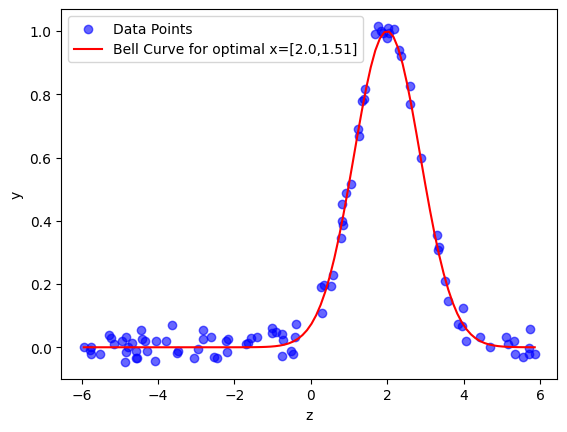

In [132]:
def plot_bell_curve(dataset, x_optimal):
    x_optimal_str = "x=[" + str(round(x_optimal[0], 2)) + "," + str(round(x_optimal[1], 2)) + "]"
    z = dataset[:, 0]
    y = dataset[:, 1]
    
    # Generate points for smooth curve
    z_range = np.linspace(min(z), max(z), 100)
    m_zx_optimal = np.exp(-((z_range - x_optimal[0]) ** 2) / x_optimal[1])

    plt.scatter(z, y, label="Data Points", color="blue", alpha=0.6)
    plt.plot(z_range, m_zx_optimal, 
    label="Bell Curve for optimal " + x_optimal_str, color="red")
    plt.xlabel("z")
    plt.ylabel("y")
    plt.legend()
    plt.show()

# Choosen 1 as alpha since from previous results it seems to be the best (and most precise) step size
x_optimal= gradient_descent(dataset1, starting_points[0], 1)

# Plot the optimal bell curve
plot_bell_curve(dataset1, x_optimal)

##### 9. Import the second file `dataset2.csv` and store its content into another numpy `nd.array`.

In [133]:
dataset2 = np.loadtxt("dataset2.csv", skiprows=2, delimiter=",")

##### 10. Plot this point cloud, with the first column on the x-axis and the second column one the y-axis.

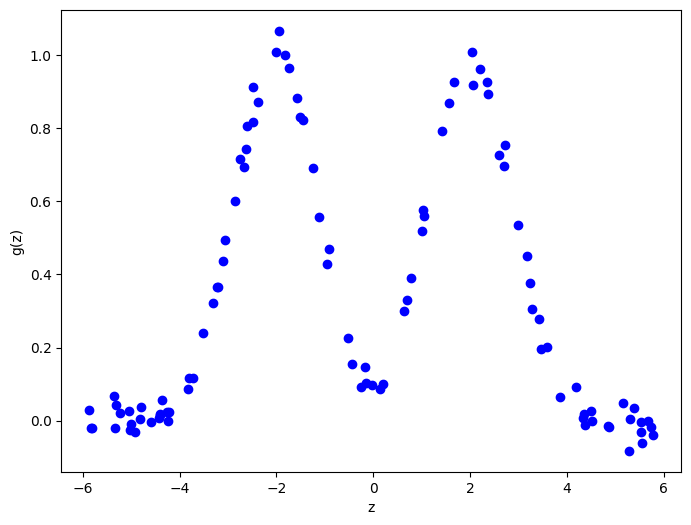

In [134]:
x2 = dataset2[:, 0] # First column from the dataset
g2 = dataset2[:, 1] # Second column from the dataset

plt.figure(figsize=(8, 6))
plt.scatter(x2, g2, color='blue')
plt.xlabel("z")
plt.ylabel("g(z)")
plt.show()

##### 11. Run the gradient descent algorithm with step size $\alpha = 10$ until convergence starting from 3 different initialisation points:
- $x^{(0)}=(0,5)$
- $x^{(0)}=(-1,1)$
- $x^{(0)}=(1,1)$

For each _initialisation point_, plot the bell curve with the parameters found by `GD`, on top of the data points. Comment the results.

Iteration 0 : x = [0. 5.] f(x) = 0.14135012406053682 gradient norm = 0.020093399643110035
Iteration 1 : x = [-0.10151616  5.17340398] f(x) = 0.13730944840288023 gradient norm = 0.020148950846539247
Iteration 2 : x = [-0.22228218  5.33469127] f(x) = 0.13326948213172574 gradient norm = 0.019901529782508403
Iteration 3 : x = [-0.35636688  5.48175718] f(x) = 0.12938681716742734 gradient norm = 0.018997250026586907
Iteration 4 : x = [-0.49441374  5.61226624] f(x) = 0.12593018003865505 gradient norm = 0.01723487797824291
Iteration 5 : x = [-0.62510397  5.72462356] f(x) = 0.12316345569092717 gradient norm = 0.014719778272506314
Iteration 6 : x = [-0.73818768  5.81885339] f(x) = 0.1211997559834867 gradient norm = 0.011856984251267876
Iteration 7 : x = [-0.82752697  5.89681042] f(x) = 0.11995206069303109 gradient norm = 0.009150018845403497
Iteration 8 : x = [-0.89214491  5.96159318] f(x) = 0.11921567284610081 gradient norm = 0.006971605531754349
Iteration 9 : x = [-0.93494126  6.01662773] f(x)

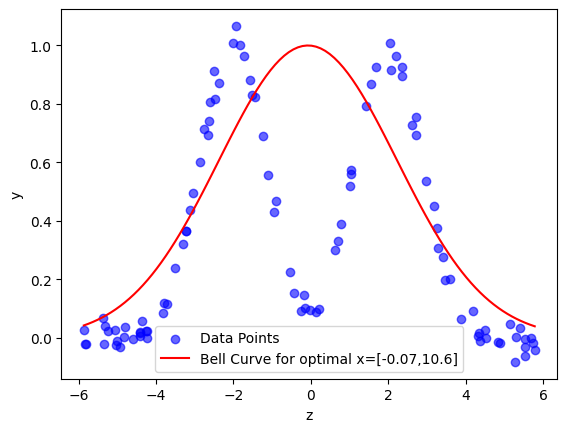

Iteration 0 : x = [-1.  1.] f(x) = 0.18395431735259418 gradient norm = 0.11191632576370375
Iteration 1 : x = [-2.08371425  1.27944557] f(x) = 0.10581170640010047 gradient norm = 0.014533434540522227
Iteration 2 : x = [-1.9445212   1.32124709] f(x) = 0.10554181240765605 gradient norm = 0.013541076486363305
Iteration 3 : x = [-2.06950544  1.37335291] f(x) = 0.10533815845642597 gradient norm = 0.012298530873743876
Iteration 4 : x = [-1.94821869  1.39372231] f(x) = 0.10519008132794666 gradient norm = 0.010940745493440008
Iteration 5 : x = [-2.05230479  1.42742805] f(x) = 0.10506889983975025 gradient norm = 0.009534855691058336
Iteration 6 : x = [-1.95756673  1.43820059] f(x) = 0.10498031891199325 gradient norm = 0.00819845744155715
Iteration 7 : x = [-2.03644657  1.46054876] f(x) = 0.10491112882733016 gradient norm = 0.006950154096849396
Iteration 8 : x = [-1.96721559  1.46667536] f(x) = 0.1048620394072604 gradient norm = 0.005841927772929973
Iteration 9 : x = [-2.02368794  1.48163149] f(x

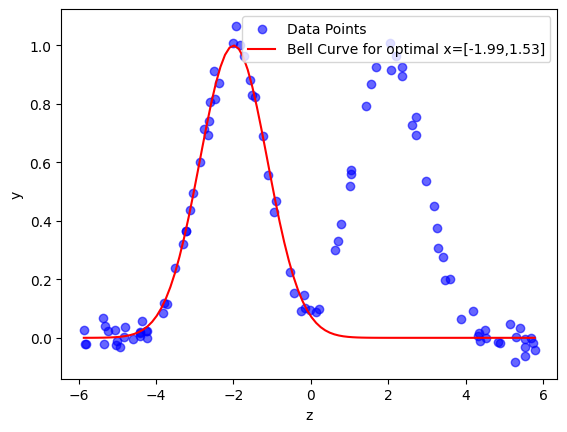

Iteration 0 : x = [1. 1.] f(x) = 0.199034207539511 gradient norm = 0.0930768634063689
Iteration 1 : x = [1.89744464 1.24682658] f(x) = 0.13452863059804931 gradient norm = 0.016321196313797463
Iteration 2 : x = [2.04039009 1.32559678] f(x) = 0.13352015995482439 gradient norm = 0.008603081410078971
Iteration 3 : x = [1.96999041 1.3750456 ] f(x) = 0.1331426165937911 gradient norm = 0.005070791717080222
Iteration 4 : x = [1.99759011 1.4175844 ] f(x) = 0.13296698982434868 gradient norm = 0.0035145695043324594
Iteration 5 : x = [1.98284172 1.44948589] f(x) = 0.1328658711776901 gradient norm = 0.0027005847392469265
Iteration 6 : x = [1.98700007 1.47616966] f(x) = 0.1328014919494827 gradient norm = 0.0021799499677382854
Iteration 7 : x = [1.98347405 1.49768211] f(x) = 0.1327584215089513 gradient norm = 0.001797879493912532
Iteration 8 : x = [1.98347057 1.5156609 ] f(x) = 0.13272884379492372 gradient norm = 0.0014991210653124679
Iteration 9 : x = [1.98224133 1.53060163] f(x) = 0.132708187507887

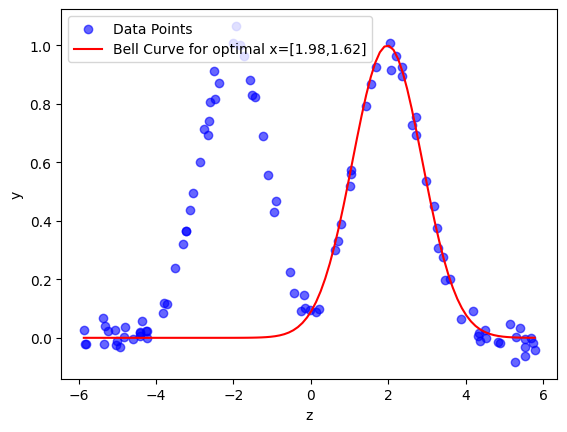

In [135]:
initialisation_points = [[0,5], [-1,1], [1,1]]

for x_init in initialisation_points:
    x_optimal = gradient_descent(dataset2, x_init, 10)
    plot_bell_curve(dataset2, x_optimal)

From the 3 graphs we notice that the first, $x^{(0)}=(0,5))$, has a very wide curve centered with respect to the _Data Points_. This suggests that the algorithm has converse in a **global minimum**.  
In contrast, the second and third graphs are much narrower and precisely follow, respectively, the first and second peaks of _Data Points_ showing that the algorithm has converse at **local limits**. In fact, these two curves, follow the trend of their respective region very well, but fail to represent the global distribution.

##### 12. Plot in 3D the surface of the objective function for $x \in [−10, 10] \times [0.2, 10]$, for the first and the second data set.

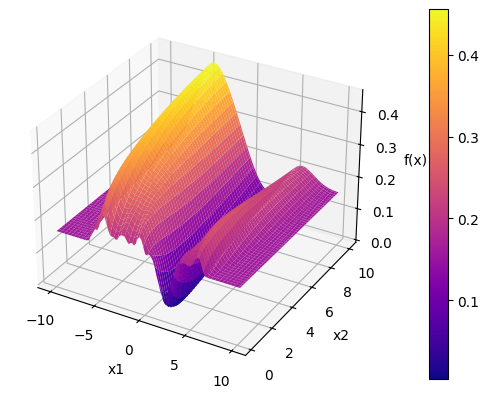

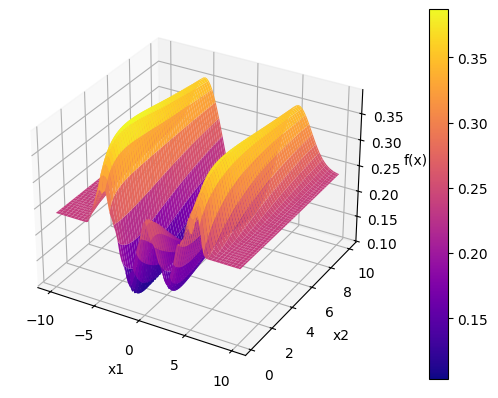

In [136]:
def plot_3d_surface(dataset):
    x1_range = np.linspace(-10, 10, 100)
    x2_range = np.linspace(0.2, 10, 100)
    X1, X2 = np.meshgrid(x1_range, x2_range)
    
    # Compute F using a simple for loop
    Z = np.zeros_like(X1)
    for i in range(X1.shape[0]):
        for j in range(X1.shape[1]):
            Z[i, j] = f([X1[i, j], X2[i, j]], dataset)

    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
    surface = ax.plot_surface(X1, X2, Z, cmap='plasma')

    # Add color bar and labels
    fig.colorbar(surface, pad=0.1)
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('f(x)')
    plt.show()

plot_3d_surface(dataset1)
plot_3d_surface(dataset2)

#### **Problem 2** (Newton’s algorithm)

From _Problem 2 of Assignment 2_ we know that the gradient of $f(x)=100(y-x^2)^2+(x-1)^2$ where $x=(x,y)$ is
$$
\bigtriangledown f(x) = 
    \begin{bmatrix} 
        \frac{\partial f}{\partial x} \\
        \frac{\partial f}{\partial y}
    \end{bmatrix}
    = 
    \begin{bmatrix} 
        -400x(y-x^2)+2(x − 1) \\
        200(y-x^2)
    \end{bmatrix}
$$

From _Problem 2 of Assignment 2_ we take also the code for `grad_f` and the `gradient_descent` algorithm:

In [137]:
def grad_f(x): # From Problem 2 of Assignment 2
    # considering that the function must be defined as f(x); unpack the input vector as 2 dimensions
    x1 = x[0]
    x2 = x[1]
    # calculate the gradient of the function
    df_dx1 = 400*x1**3 - 400*x1*x2 + 2*x1 - 2
    df_dx2 = 200*x2 - 200*x1**2
    # return the gradient as a vector
    return np.array([df_dx1, df_dx2])

def gradient_descent(f, gradient, alpha, x_start, max_iter=1000, tol=1e-6):
    # I have passed the function f because is requested to be passed as an argument,
    #  but onestly, according to the Gradient Descent Algorithm given in the lecture notes, 
    #  i don't understand why the function f is needed, since we only need the gradient of f.
    k = 0
    x_k = x_start
    g_k = gradient(x_k)
    iterates = [x_k]
    while np.linalg.norm(g_k) > tol and k < max_iter:
        x_k = x_k - alpha * g_k
        g_k = gradient(x_k)
        k += 1
        iterates.append(x_k)
    return iterates, k

According to the formula for **Multivariate Newton’s step** 
$$
x^{(k+1)} = x^{(k)} + d_N = x^{(k)} - \left[ \nabla^2 f(x^{(k)}) \right]^{-1} \nabla f(x^{(k)}).
$$
since we already have $\nabla f(x)$ we have to compute $\nabla^2 f(x^{(k)})$ that is the _Hessian matrix_
$$
\nabla^2 f(x) = H(x) = \begin{pmatrix}
\frac{\partial^2 f}{\partial x_1^2} & \frac{\partial^2 f}{\partial x_1 \partial x_2} & \cdots & \frac{\partial^2 f}{\partial x_1 \partial x_n} \\
\frac{\partial^2 f}{\partial x_2 \partial x_1} & \frac{\partial^2 f}{\partial x_2^2} & \cdots & \frac{\partial^2 f}{\partial x_2 \partial x_n} \\
\vdots & \vdots & \ddots & \vdots \\
\frac{\partial^2 f}{\partial x_n \partial x_1} & \frac{\partial^2 f}{\partial x_n \partial x_2} & \cdots & \frac{\partial^2 f}{\partial x_n^2}
\end{pmatrix}
$$

So the components of $H(x)$ are computed as:
- $\frac{\partial^2 f}{\partial x^2} = -400y+1200x^2+2$
- $\frac{\partial^2 f}{\partial x \partial y} = \frac{\partial^2 f}{\partial x} (\frac{\partial^2 f}{\partial y}) = \frac{\partial^2 f}{\partial x} 200(y-x^2) = -400x$
- $\frac{\partial^2 f}{\partial y^2} = 200$

resulting in 
$$
\nabla^2 f(x) = H(x) =  
    \begin{pmatrix}
        -400y+1200x^2+2 & -400x \\
        -400x & 200
    \end{pmatrix}
$$

So, the implementation of the _Newton's algorithm_ is the following:

In [138]:
def hess_f(x):
    d2f_dx2 = 1200 * x[0]**2 - 400 * x[1] + 2
    d2f_dxdy = -400 * x[0]
    d2f_dy2 = 200
    return np.array([
        [d2f_dx2, d2f_dxdy],
        [d2f_dxdy, d2f_dy2]
    ])

def newton_method(x0, tol=1e-6, max_iter=1000):
    x = x0
    for k in range(max_iter):
        grad = grad_f(x)
        if np.linalg.norm(grad) < tol:
            break
        hess = hess_f(x)
        d = np.linalg.solve(hess, -grad)
        x = x + d
    return x, k + 1

Now we can run both algorithms and compare the number of iterations needed to converge for both algorithms:

In [139]:
x_min_newton, iterations_newton = newton_method(np.array([2.0, 2.0]))
print("Minimum of Newton's Method:", x_min_newton, " found after", iterations_newton, "iterations")
x_gd, iterations_gd = gradient_descent(f, grad_f, 0.001, [2.0, 2.0], 100000)
print("Minimum of Gradient Descent:", x_gd[-1], " found after", iterations_gd, "iterations")

Minimum of Newton's Method: [1. 1.]  found after 6 iterations
Minimum of Gradient Descent: [1.00000112 1.00000224]  found after 32273 iterations


We note that _Newton's method_ performs much better than the _Gradient Descent_ algorithm in that it reaches the minimum of the function in far fewer iterations.
There is also to mention the fact that _Newton's method_ reaches a “stable” minimum in very few iterations, while _Gradient Descent_ reaches an approximate minimum in a few thousand iterations (with an average $\alpha$ value) by reaching the maximum number of iterations allowed, while to have a “stable” value without reaching the maximum number of iterations, tens of thousands of iterations are needed.

This makes us say that _Newton's method_ is more complex since it requires computation of the Hessian matrix, but this extra “cost” is amply compensated by the performance of the algorithm.

#### **Problem 3** (Newton and Line Search)
We consider the bivariate function
$$
f(x) = 4x_1^2-3x_1+x_2^2+2x_2
$$

##### 1. Define a function that computes $f (x)$ for any $x = (x_1, x_2)$ and evaluate it at $x(0) = (0, 0)$.

In [140]:
def f(x):
    x1, x2 = x[0], x[1]     # Extract x1 and x2 from x
    return 4 * x1**2 - 3 * x1 + x2**2 + 2 * x2

print('f(x) with x=(0,0) =', f([0,0]))

f(x) with x=(0,0) = 0


##### 2. Define a function that computes the gradient of $f$ , $\nabla f (x)$ for any $x = (x1, x2)$ and evaluate it at $x(0) = (0, 0)$.

Since the partial derivate with respect to $x_1$ is
$$
    \frac{\partial f}{\partial x_1} = 2\cdot 4x_1 - 3 = 8x_1 -3
$$
and the partial derivate with respect to $x_2$ is
$$
    \frac{\partial f}{\partial x_2} = 2\cdot x_2 +2 = 2x_2 +2
$$

The gradient of $f$ results to be
$$
    \nabla f(x) = \begin{bmatrix}
        8x_1 -3\\
        2x_2 +2
    \end{bmatrix}
$$

In [141]:
def grad_f(x):
    x1, x2 = x[0], x[1]     # Extract x1 and x2 from x
    df_dx1 = 8*x1 - 3
    df_dx2 = 2*x2 + 2
    return np.array([df_dx1, df_dx2])

print('Gradient of f(x) with x=(0,0) =', grad_f([0,0]))

Gradient of f(x) with x=(0,0) = [-3  2]


##### 3. Define a function that computes the Hessian of $f$ , $\nabla ^2f (x)$ for any $x = (x1, x2)$ and evaluate it at $x(0) = (0, 0)$.

- $\frac{\partial^2 f}{\partial x_1^2} = 8$
- $\frac{\partial^2 f}{\partial x_2^2} = 2$

Since the partial derivate of $x_1$ does not contains $x_2$ and viceversa, $\frac{\partial^2 f}{\partial x_1 \partial x_2} = \frac{\partial^2 f}{\partial x_2 \partial x_1} = 0$ resulting into
$$
H(x) = \nabla^2 f(x) =  
    \begin{pmatrix}
        8 & 0 \\
        0 & 2
    \end{pmatrix}
$$

In [142]:
def hessian_f(x):
    # Since there is no x_2 in df_dx1 and no x_1 in df_dx2, the second order derivates are constant, 
    # and so the Hessian matrix is constant.

    # x1, x2 = x[0], x[1]     # Extract x1 and x2 from x

    d2f_dx1 = 8
    d2f_dx2 = 2
    d2f_dxdy = 0
    d2f_dydx = 0
    
    return np.array([[d2f_dx1, d2f_dxdy], [d2f_dydx, d2f_dx2]])

print('Hessian of f(x) with x=(0,0) =', hessian_f([0,0]))

Hessian of f(x) with x=(0,0) = [[8 0]
 [0 2]]


##### 4. Compute the Newton’s direction $d_N$ at the point $x^{(0)} = (0, 0)$ and check if it is descent direction.

Since the Newton's direction $d_N$ is defined as
$$
d_N = -\frac{1}{2} Q^{-1} g = -[\nabla^2 f (x^{(k)})]^{-1} \nabla f(x^{(k)})
$$

and knowing that $\nabla f([0,0]) = \begin{bmatrix}
    -3\\
    2
\end{bmatrix}$, we can rewrite the formula using $\nabla f(x)$ and $H(x) = \nabla^2 f(x)$ computed before as
$$
    d_N = 
        - \begin{pmatrix}
        8 & 0 \\
        0 & 2
        \end{pmatrix}^{-1} 
    \cdot  
        \begin{bmatrix}
            -3\\
            2
        \end{bmatrix} 
    = 
        - \begin{pmatrix}
            \frac{1}{8} & 0 \\
            0 & \frac{1}{2}
        \end{pmatrix}
    \cdot 
        \begin{bmatrix}
            -3\\
            2
        \end{bmatrix} 
    = 
        \begin{bmatrix}
            \frac{3}{8} \\
            -1
        \end{bmatrix}
$$

Then knowing that $\nabla f (x^{(k)})^T d^{(k)} \lt 0$ if $d^{(k)}$ is descent direction, we can verify if $d_N$ is descent direction (with $x^{(0)} = (0,0)$) by computing
$$
    \begin{bmatrix}
        -3\\
        2
    \end{bmatrix}^T \begin{bmatrix}
            \frac{3}{8} \\
            -1
        \end{bmatrix} = -3 * \frac{3}{8} + 2 * (-1) = -\frac{9}{8} - 2 = -\frac{25}{8} = \nabla f (x^{(k)})^T d^{(k)} \lt 0
$$
And since $\nabla f (x^{(k)})^T d^{(k)} = -\frac{25}{8}$ is indeed $\lt 0$ we know that $d_N$ is descent direction.

##### 5. Define a function `line_search` that computes the value of the line search objective function, in the Newton’s direction for a given (anchor) point $x$ and any step size $\alpha$:
$$
    h(\alpha) = f(x + \alpha d_N)
$$

In [143]:
def line_search(f, x, alpha, d_N):
    return f(x + alpha * d_N)

##### 6. Plot the graph of the function $h(\alpha)$ for $\alpha \in [0, 2.5]$ and $x = x^{(0)} = (0, 0)$. What would be the value of $\alpha$ in exact line search? (give an approximate value using the previous plot).

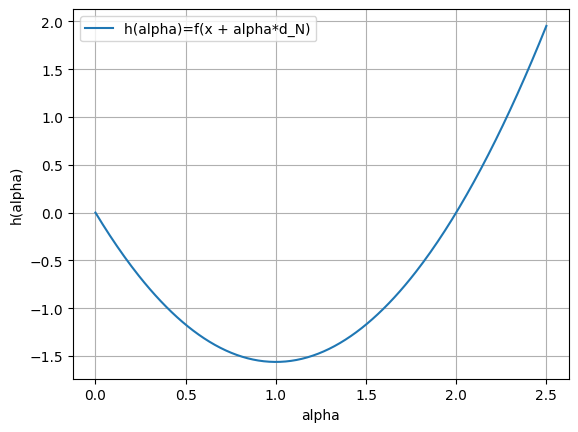

In [144]:
x0 = np.array([0.0, 0.0])               # Anchor point
dN = np.array([3/8, -1])                # Newton's direction
alphas = np.linspace(0, 2.5, 250)

h_vals = []

for alpha in alphas:
    h_vals.append(line_search(f, x0, alpha, dN))

plt.plot(alphas, h_vals, label='h(alpha)=f(x + alpha*d_N)')
plt.xlabel('alpha')
plt.ylabel('h(alpha)')
plt.grid(True)
plt.legend()
plt.show()

The value of $\alpha$ in the exact line search (i.e. $\min_{\alpha > 0} h(x)$), according to the plot, seems to be at $\alpha \approx 1$.

##### 7. We now want to find a step size $\alpha$ that verifies the Wolfe conditions. Define a function `first_wolfe` that compute $\ell(\alpha)$ defined as
$$
    \ell (\alpha) = f(x^{(0)}) + \alpha \eta \nabla f(x^{(0)})^T d_N
$$
with relaxation parameter $\eta = 0.2$.

In [145]:
def first_wolfe(f, x, alpha, grad_f, d_N, eta = 0.2):
    return f(x) + alpha * eta * grad_f(x).dot(d_N)

##### 8. Plot the graph of $\ell(\alpha)$ for $\alpha \in [0, 2.5]$ on top of the graph of $h(\alpha)$. What would be acceptable values of $\alpha$ according to the first Wolfe conditions? You can give an approximate value given the plot or, optionally, find the value $\alpha^*$ at which $h(\alpha)$ intersects $\ell(\alpha)$. Hint: you can use the function `fsolve` from the `package scipy.optimize`.

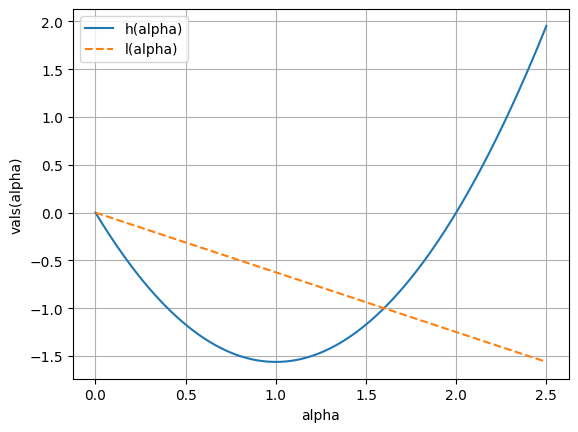

In [146]:
l_vals = []
for alpha in alphas:
    l_vals.append(first_wolfe(f, x0, alpha, grad_f, dN))

plt.plot(alphas, h_vals, label='h(alpha)')
plt.plot(alphas, l_vals, '--', label='l(alpha)')
plt.xlabel('alpha')
plt.ylabel('vals(alpha)')
plt.legend()
plt.grid(True)
plt.show()

The acceptable values of $\alpha$, according to the first Wolfe conditions ($h(\alpha)$ should be no larger than $\ell(\alpha)$, i.e. $h(\alpha)\le \ell(\alpha)$), are $\alpha \approx [0, 1.6]$

##### 9. We now consider the second Wolfe condition:
$$
\nabla f(x^{(0)} + \alpha d_N)^T d_N \geq \bar{\eta} \nabla f(x^{(0)})^T d_N
$$
with $\bar{\eta} = 0.7$. First explain why this condition is equivalent to:
$$
\frac{\nabla f(x^{(0)} + \alpha d_N)^T d_N}{\nabla f(x^{(0)})^T d_N} \leq \bar{\eta}
$$

Second, define a function `second_wolfe` that compute the ratio
$$
    r(\alpha) = \frac{\nabla f(x^{(0)} + \alpha d_N)^T d_N}{\nabla f(x^{(0)})^T d_N}
$$
for any $\alpha$.

Starting from $\nabla f(x^{(0)} + \alpha d_N)^T d_N \geq \bar{\eta} \nabla f(x^{(0)})^T d_N$ we can devide both sides with $\nabla f(x^{(0)})^T d_N$ in order to isolate $\bar{\eta}$, and since $d_N$ is descent (see Problem 3.4) $\nabla f(x^{(0)})^T d_N$ will be negative, requiring also to flipt the sign of the inequality resulting into
$$
    \frac{\nabla f(x^{(0)} + \alpha d_N)^T d_N}{\nabla f(x^{(0)})^T d_N} \leq \bar{\eta} = \bar{\eta} \cdot 1 = \bar{\eta} \frac{\nabla f(x^{(0)})^T d_N}{\nabla f(x^{(0)})^T d_N} 
$$

In [147]:
def second_wolfe(f, x, alpha, grad_f, d_N):
    nominator = grad_f(x + alpha * d_N).dot(d_N)
    denominator = grad_f(x).dot(d_N)

    ratio = nominator / denominator
    return ratio

##### 10. Plot the graph of $r(\alpha)$ for $\alpha \in [0, 2.5]$ on top of the graph of $h(\alpha)$ and $\ell(\alpha)$. What would be the acceptable values of $\alpha$ according to both Wolfe conditions? You can give an approximate value given the plot or, optionally, find the value $\alpha^*$ at which $r(\alpha) = \bar{\eta}$. Hint: you can use the function `fsolve` from the `package scipy.optimize`.

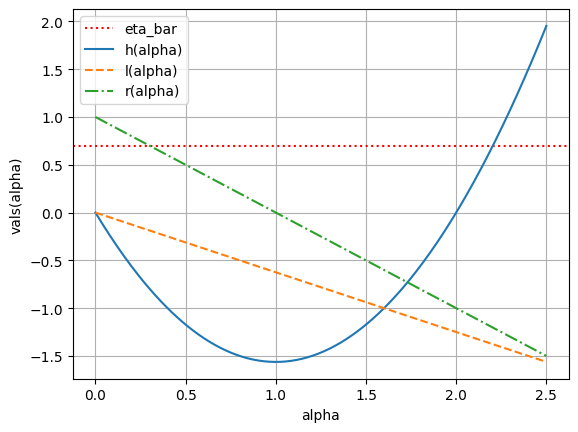

In [148]:
r_vals = []
for alpha in alphas:
    r_vals.append(second_wolfe(f, x0, alpha, grad_f, dN))

eta_bar = 0.7
plt.axhline(y=eta_bar, color='r', linestyle=':', label='eta_bar')

plt.plot(alphas, h_vals, label='h(alpha)')
plt.plot(alphas, l_vals, '--', label='l(alpha)')
plt.plot(alphas, r_vals, '-.', label='r(alpha)')
plt.xlabel('alpha')
plt.ylabel('vals(alpha)')
plt.legend()
plt.grid(True)
plt.show()

According to both Wolfe conditions ($h(\alpha)\le \ell(\alpha)$ and $r(\alpha)\le \bar{\eta})=0.7$), from the plot we can say that the accepted values of $\alpha$ are:
$$
\alpha =  \{h(\alpha)\le \ell(\alpha)\} \cap \{r(\alpha)\le \bar{\eta}\} \approx [0.0, 1.6] \cap [0.3, 2.5] = [0.3, 1.6]
$$